Import Libraries 

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib  inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [168]:
df=pd.read_csv('Dataset.csv')#read data through with pandas

EDA

In [169]:
pd.set_option('display.max_columns',40)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [171]:
df.shape

(25000, 24)

In [172]:
df.duplicated().sum()

0

In [173]:
df.describe()#we Looking at the table, we can see no outliers based on the mean and maximum values. Additionally, we can perform outlier detection using the IQR method in the future.

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [174]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [175]:
#df.isnull().sum()*100/len(df)
# Calculate the percentage of null values in each column
df.isnull().sum().apply(lambda x: x * 100 / len(df))

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [176]:
for features in df.select_dtypes("O").columns:
    print(features,'->', df[features].unique())
    print()

Ware_house_ID -> ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']

WH_Manager_ID -> ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']

Location_type -> ['Urban' 'Rural']

WH_capacity_size -> ['Small' 'Large' 'Mid']

zone -> ['West' 'North' 'South' 'East']

WH_regional_zone -> ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']

wh_owner_type -> ['Rented' 'Company Owned']

approved_wh_govt_certificate -> ['A' 'A+' 'C' 'B' 'B+' nan]



In [177]:
for features in df.select_dtypes(np.number).columns:
    print(features,'-->', df[features].unique())
    print()

num_refill_req_l3m --> [3 0 1 7 8 4 6 5 2]

transport_issue_l1y --> [1 0 4 3 2 5]

Competitor_in_mkt --> [ 2  4  3  5  1  8  7  6 10  9 12  0]

retail_shop_num --> [ 4651  6217  4306 ...  7768  7931 10562]

distributor_num --> [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]

flood_impacted --> [0 1]

flood_proof --> [1 0]

electric_supply --> [1 0]

dist_from_hub --> [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189  65 156 199  80 140  67 229  98 154 230 164 197 262 125  94 153
 216 247 123 167 220 134  64 196 240  85 253  66 168 219 110  69 239 237
 113 181 255  90 151  58 256  84  83 173 212 158  55 257  70 160  96 108
 271 263 234 109 198 182 114 166 141 165 204  60 130 254 227 248 252 177
 105  79 232 171  92 223 144  86 128 145  99 115 187 200 260 215  97 106
 133 218 119 206 233 235  81 264 142 101 186 246 176 267 211 221 175

In [178]:
df.workers_num.fillna(df.workers_num.mean(),inplace=True)

In [179]:
df.approved_wh_govt_certificate.fillna(df.approved_wh_govt_certificate.mode()[0],inplace=True)

In [180]:
print(df.columns)

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [181]:
df.drop(['wh_est_year'],axis=1,inplace=True)


In [182]:
df.isnull().sum().apply(lambda x: x * 100 / len(df)) #chheck again all null values

Ware_house_ID                   0.0
WH_Manager_ID                   0.0
Location_type                   0.0
WH_capacity_size                0.0
zone                            0.0
WH_regional_zone                0.0
num_refill_req_l3m              0.0
transport_issue_l1y             0.0
Competitor_in_mkt               0.0
retail_shop_num                 0.0
wh_owner_type                   0.0
distributor_num                 0.0
flood_impacted                  0.0
flood_proof                     0.0
electric_supply                 0.0
dist_from_hub                   0.0
workers_num                     0.0
storage_issue_reported_l3m      0.0
temp_reg_mach                   0.0
approved_wh_govt_certificate    0.0
wh_breakdown_l3m                0.0
govt_check_l3m                  0.0
product_wg_ton                  0.0
dtype: float64

In [183]:
df['WH_regional_zone']=df['WH_regional_zone'].apply(lambda x:x[-1])    ### Removing the Zone from "WH_reginal _zone"

In [184]:
#df['WH_regional_zone']=pd.to_numeric(df.WH_regional_zone)
df['WH_regional_zone'] = df['WH_regional_zone'].apply(int)

In [185]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  int64  
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [192]:
result=df.groupby(['approved_wh_govt_certificate', 'wh_owner_type']).size().reset_index(name='Count')
result

,approved_wh_govt_certificate,wh_owner_type,Count
0,A,Company Owned,2540
1,A,Rented,2131
2,A+,Company Owned,2278
3,A+,Rented,1913
4,B,Company Owned,2611
5,B,Rented,2201
6,B+,Company Owned,2621
7,B+,Rented,2296
8,C,Company Owned,3528
9,C,Rented,2881


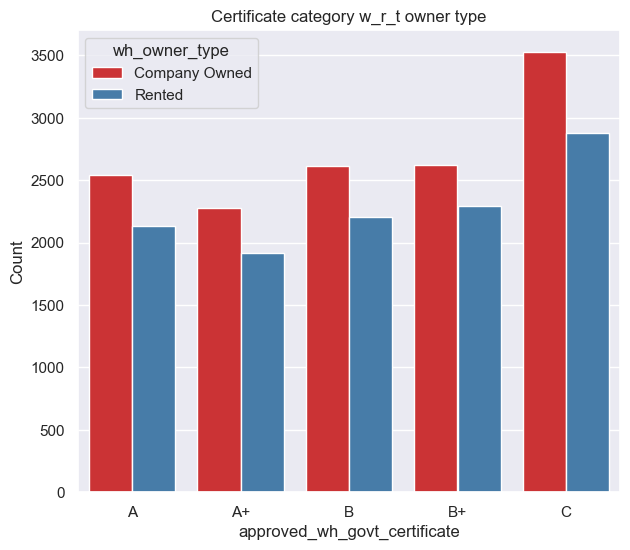

In [198]:
plt.figure(figsize=(7,6))
palette = sns.color_palette('Set1')
sns.barplot(x='approved_wh_govt_certificate', y='Count', hue='wh_owner_type', data=result, palette=palette)
plt.title("Certificate category w_r_t owner type")
plt.show()

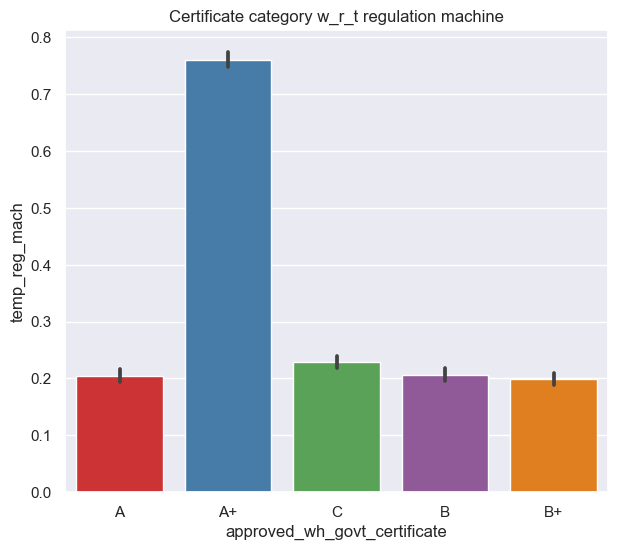

In [202]:
plt.figure(figsize=(7, 6))

# Choose a color palette (e.g., 'Set3' for a qualitative color palette)
palette = sns.color_palette('Set1')

sns.barplot(data=df, x='approved_wh_govt_certificate', y='temp_reg_mach', palette=palette)
plt.title("Certificate category w_r_t regulation machine")

plt.show()

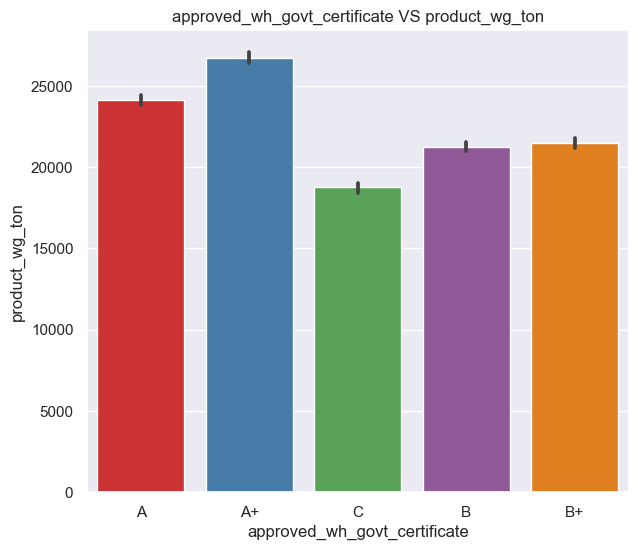

In [206]:
plt.figure(figsize=(7, 6))
palette = sns.color_palette('Set1')
sns.barplot(data=df, x='approved_wh_govt_certificate', y='product_wg_ton', palette=palette)
plt.title("approved_wh_govt_certificate VS product_wg_ton")

plt.show()

<Axes: >

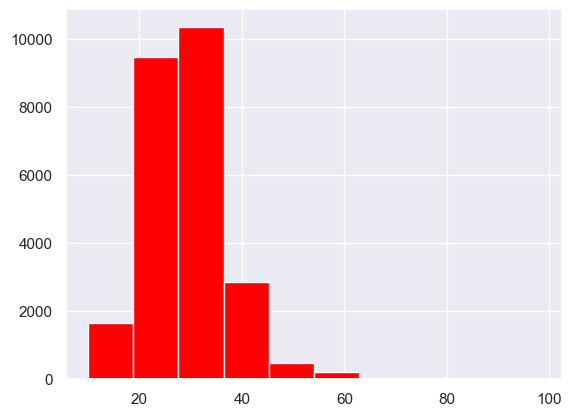

In [187]:
df['workers_num'].hist(color='red')


<Figure size 700x600 with 0 Axes>

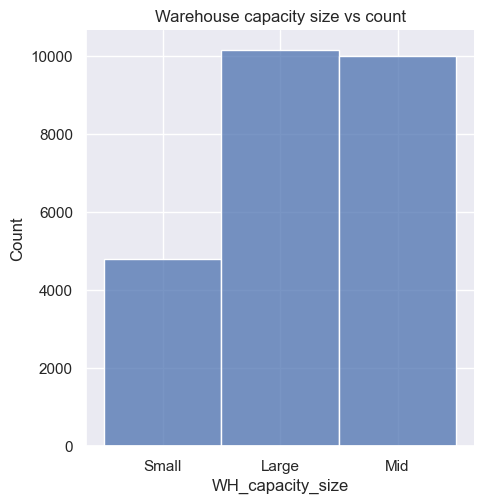

In [213]:
plt.figure(figsize=(7, 6))

sns.displot(df['WH_capacity_size'], kde_kws={'color': 'black'})
plt.title("WH_capacity_size vs count")

plt.show()
#Warehouse Large and Mid size Warehouse are having 
#approx equal num of warehouse and we see large difference against small size warehouse

Text(0.5, 1.0, ' Distribution plot of Production weight shipped to warehouse')

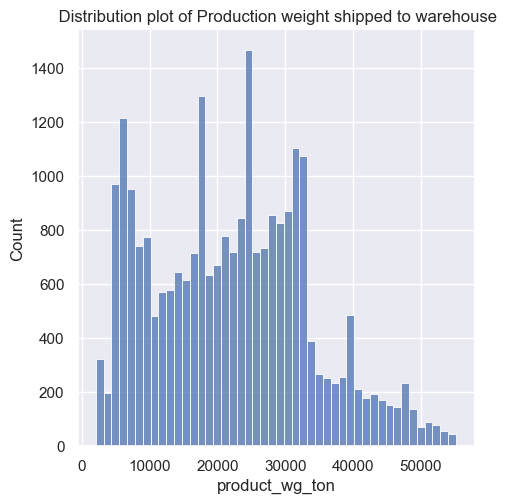

In [214]:
sns.displot(df['product_wg_ton'])
plt.title(" Distribution plot of product_wg_ton move to warehouse")

Text(0.5, 1.0, ' Distribution plot of workers num')

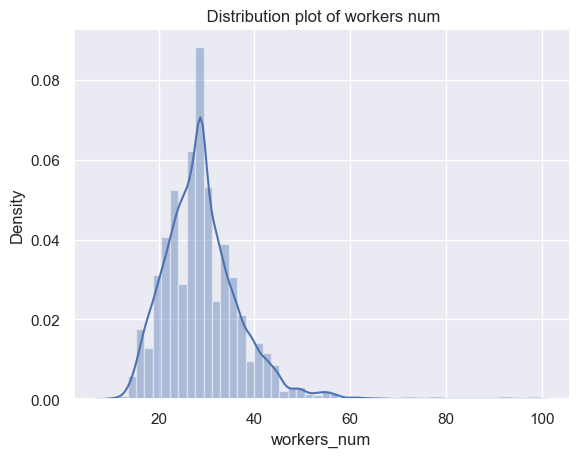

In [215]:
sns.distplot(df['workers_num'])
plt.title(" Distribution plot of workers_num")

22

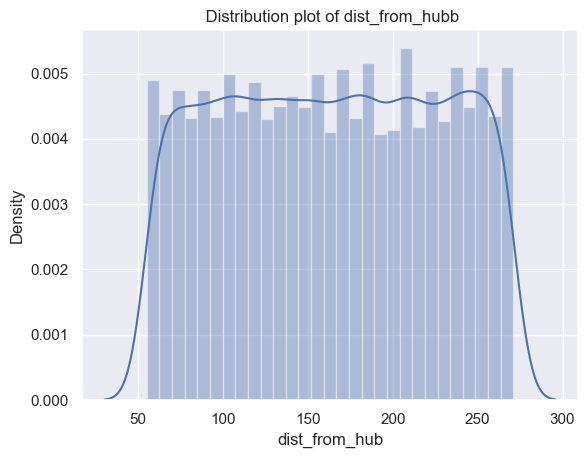

In [217]:
sns.distplot(df['dist_from_hub'])
plt.title(" Distribution plot of dist_from_hubb")
df['retail_shop_num'].value_counts().max()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

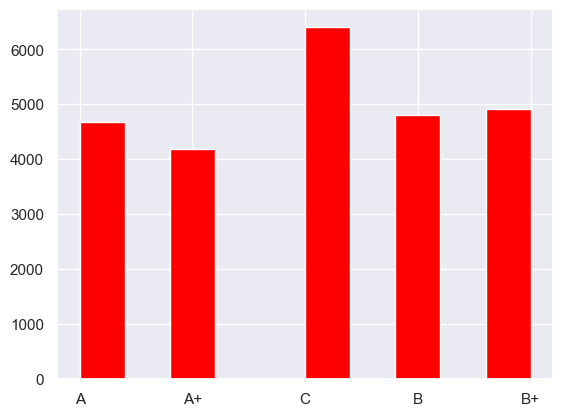

In [219]:
df['approved_wh_govt_certificate'].hist(color='red')
df['approved_wh_govt_certificate'].value_counts()

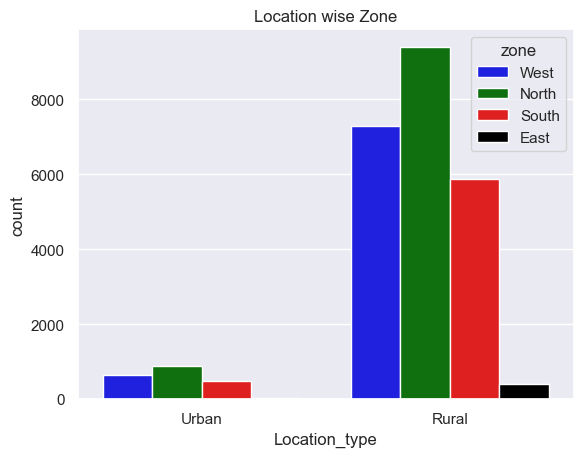

In [220]:
zone_colors = {'West': 'blue', 'North': 'green', 'South': 'red', 'East': 'black'}

sns.countplot(data=df, x='Location_type', hue='zone', palette=zone_colors)
plt.title('Location wise Zone')
plt.show()

Text(0.5, 1.0, 'Reln Between Production and num of distributor')

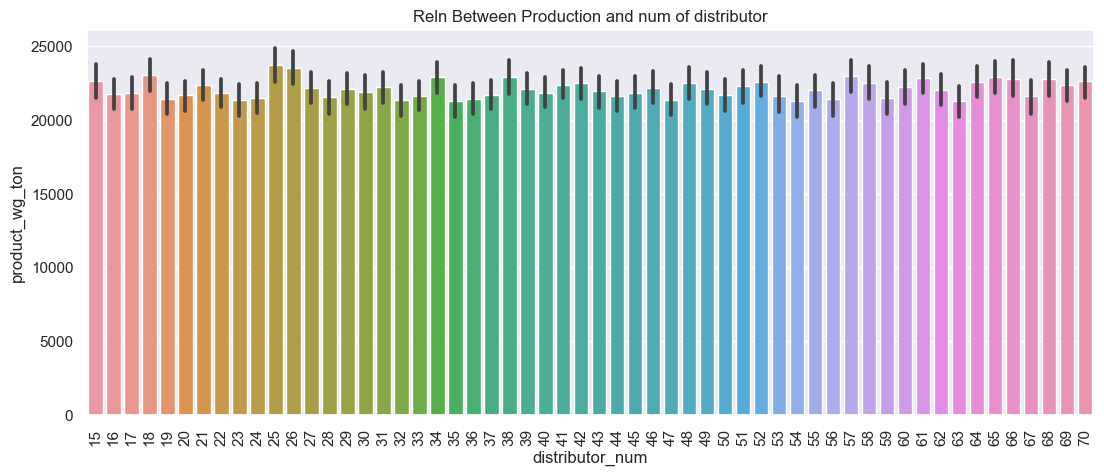

In [221]:
plt.figure(figsize=(13,5))
sns.barplot(df,x='distributor_num',y='product_wg_ton')
plt.xticks(rotation=90)
plt.title("Reln Between Production and num of distributor")
#Not to find any strong relationship b/w product_wg_ton with distributor_num

Text(0.5, 1.0, 'count of WH_regional_zone')

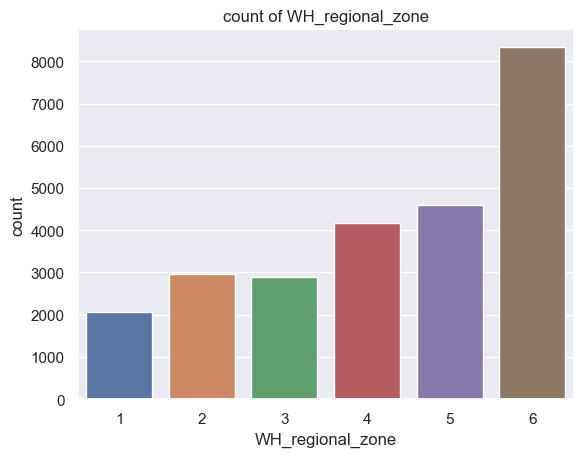

In [224]:
sns.countplot(x = 'WH_regional_zone',data = df)
plt.title("count of WH_regional_zone")#most wH are present in zone 6

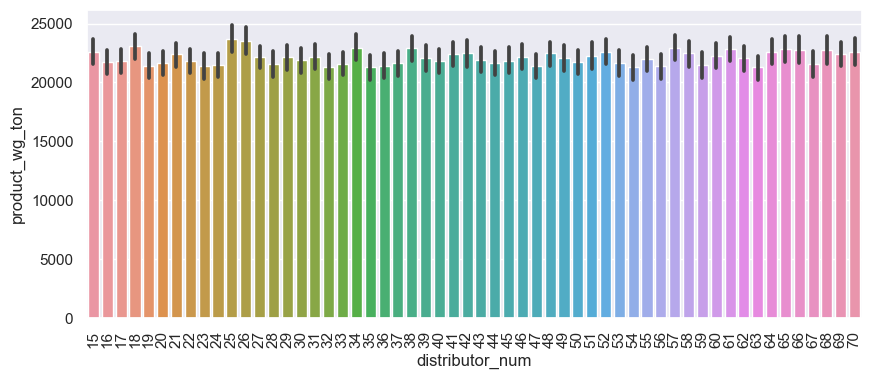

In [225]:
plt.figure(figsize=(10,4))
sns.barplot(df,x='distributor_num',y='product_wg_ton')
plt.xticks(rotation=90)
plt.show()

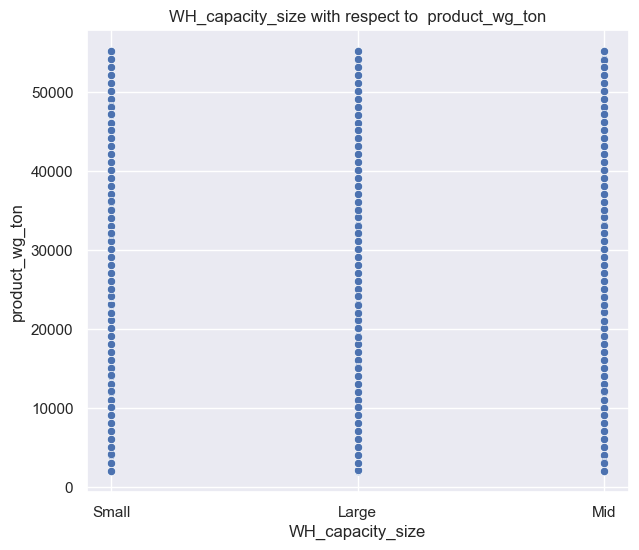

In [230]:
plt.figure(figsize=(7, 6))

sns.scatterplot(data=df, x='WH_capacity_size', y='product_wg_ton')
plt.title("WH_capacity_size with respect to  product_wg_ton")

plt.show()
#we can observe that even small WH_capacity_size having capability handle product_wg_ton upto 50000

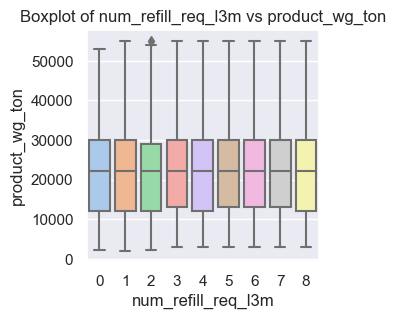

In [232]:
plt.figure(figsize=(3, 3))

# Choose a color palette (e.g., 'pastel' for a soft color palette)
palette = sns.color_palette('pastel')

sns.boxplot(data=df, x='num_refill_req_l3m', y='product_wg_ton', palette=palette)
plt.title("Boxplot of num_refill_req_l3m vs product_wg_ton")

plt.show()

In [233]:

result = df.pivot_table(index='approved_wh_govt_certificate', values='wh_owner_type', aggfunc='count', fill_value=0)

# Display the result
print(result)

                              wh_owner_type
approved_wh_govt_certificate               
A                                      4671
A+                                     4191
B                                      4812
B+                                     4917
C                                      6409


<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

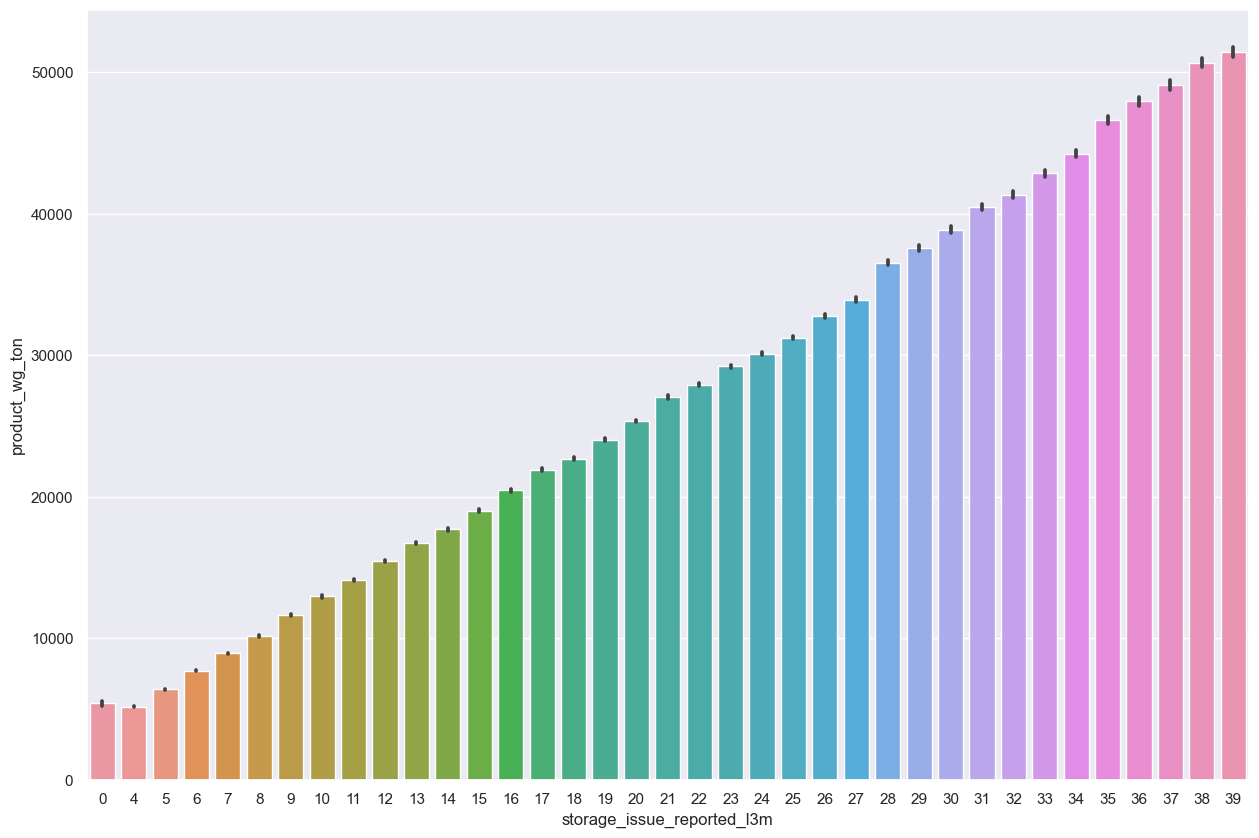

In [234]:
sns.title='storage_issue VS Prediction'
plt.figure(figsize=(15,10))
sns.barplot(df,x='storage_issue_reported_l3m',y='product_wg_ton')
#As production increases, the corresponding rise in warehouse issues becomes evident. 
#Therefore, the variable "storage_issue_reported" is correlated with the dependent feature.

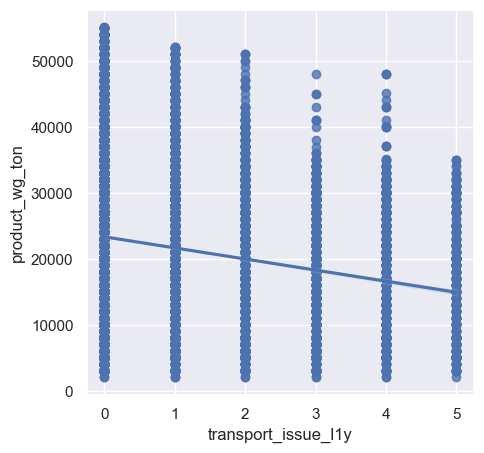

In [235]:
plt.figure(figsize=(5,5))
sns.regplot(df,x='transport_issue_l1y',y='product_wg_ton')
sns.title='transport issues vs prediction'

<Axes: xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

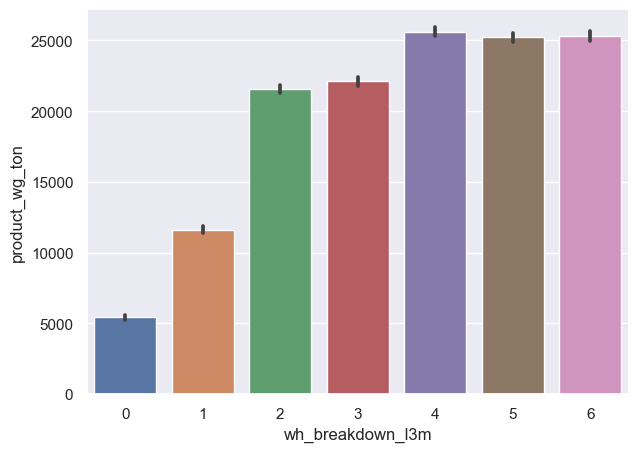

In [236]:
sns.title='wh_breakdown_l3m VS product_wg_ton'
plt.figure(figsize=(7,5))
sns.barplot(df,x='wh_breakdown_l3m',y='product_wg_ton')


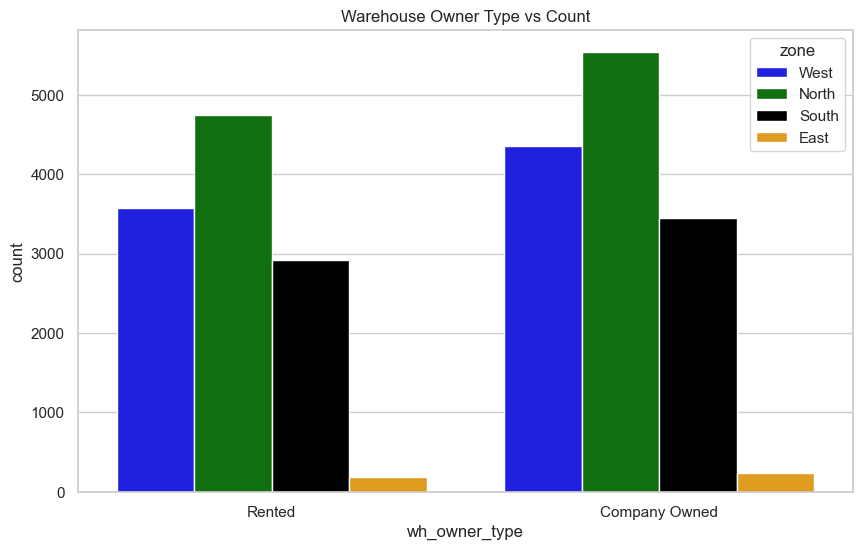

In [237]:
zone_colors = {'West': 'blue', 'North': 'green', 'South': 'Black', 'East': 'orange'}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a countplot with different colors for each 'zone'
sns.countplot(data=df, x='wh_owner_type', hue='zone', palette=zone_colors)
plt.title('Warehouse Owner Type vs Count')

plt.show()
#Most of warehouse are owned 
#by company but not much difference between company owned and rented

the correlation between independent variables, but beforehand, I'll convert all data types to integers by applying labeling to categorical variables. Additionally, I'll exclude 'Ware_house_ID' and 'WH_Manager_ID' from the analysis, as they are not expected to contribute to the dependent feature.

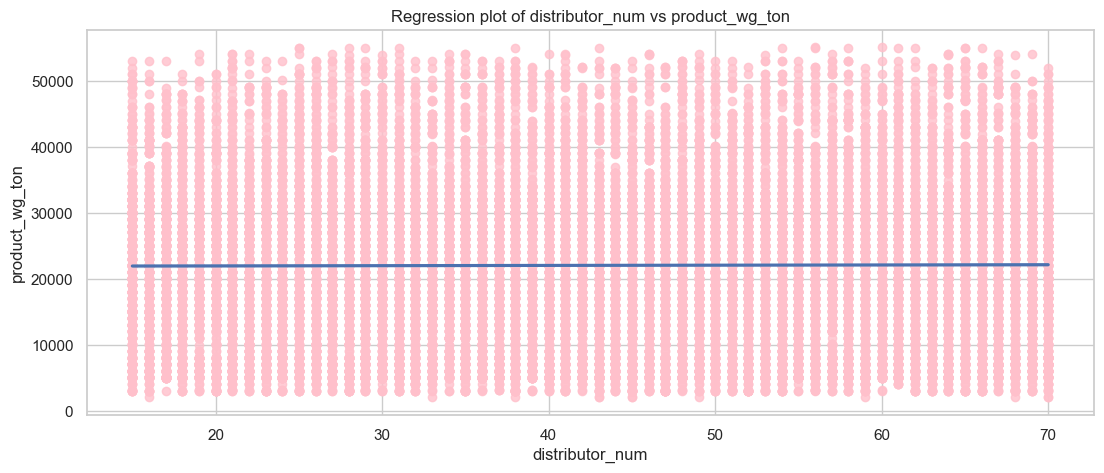

In [240]:
plt.figure(figsize=(13, 5))

# Choose a color for the scatter points
scatter_color = 'pink'

sns.regplot(data=df, x='distributor_num', y='product_wg_ton', scatter_kws={'color': scatter_color})
plt.title("Regression plot of distributor_num vs product_wg_ton")

plt.show()

In [241]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'],axis=1,inplace=True)

In [242]:
obj_typ_fea=df.select_dtypes(include='object')
obj_typ_fea.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [243]:
oblist=['Location_type', 'WH_capacity_size',
       'zone', 'wh_owner_type', 'approved_wh_govt_certificate']

In [244]:
data=pd.get_dummies(df,columns=oblist,prefix=oblist,drop_first=True)
data.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,0,1


In [245]:
data.shape

(25000, 27)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

HEATMAP

<Axes: >

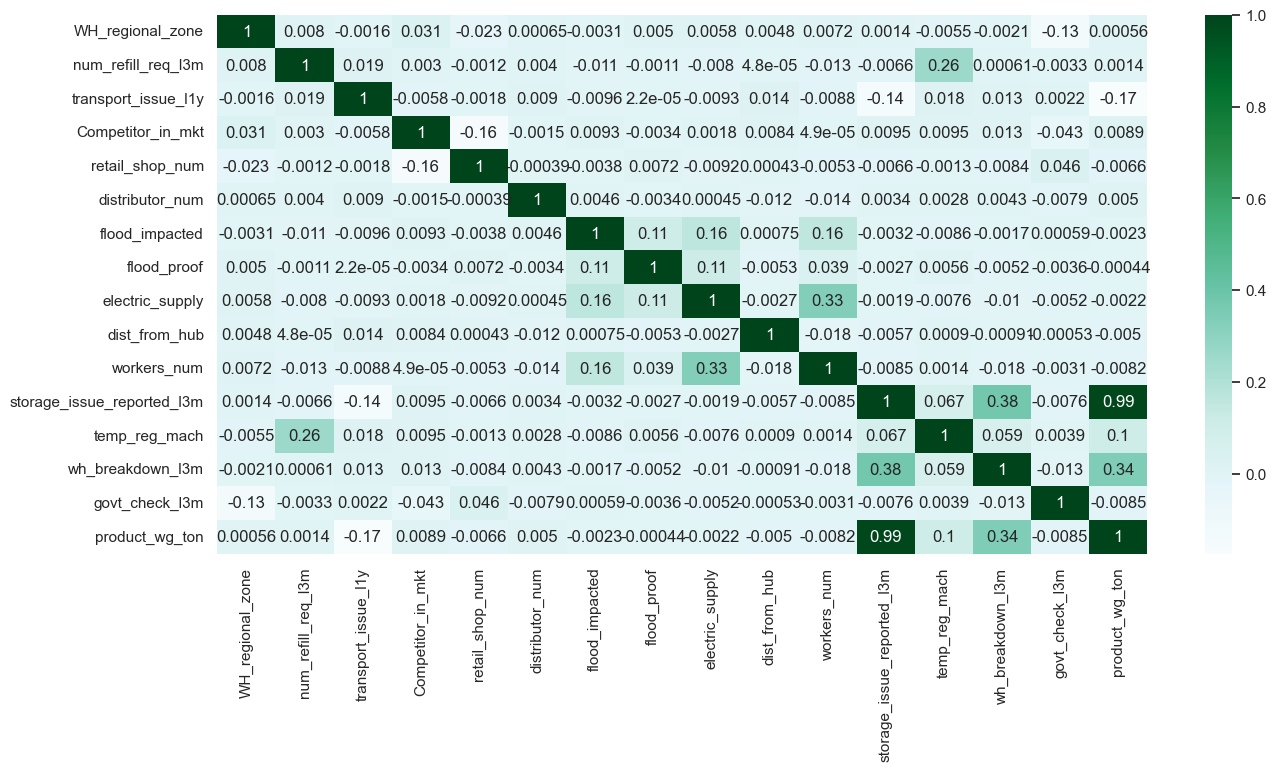

In [247]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='BuGn')

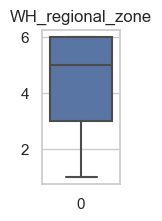

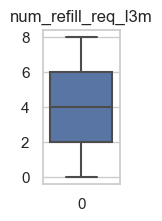

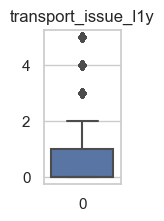

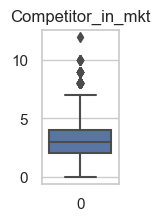

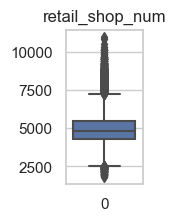

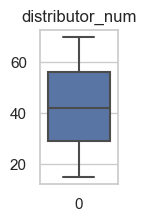

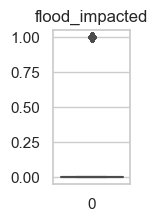

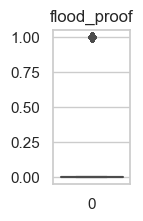

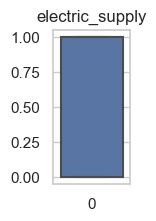

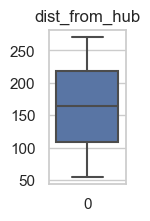

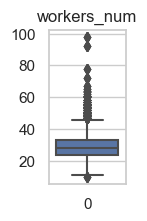

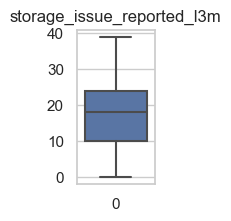

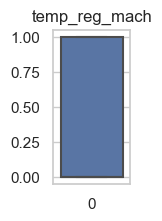

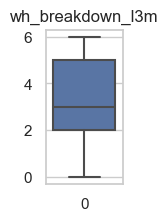

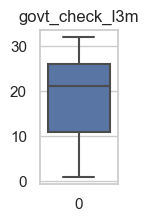

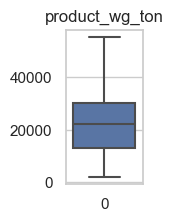

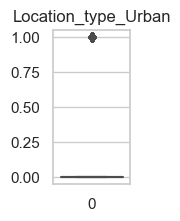

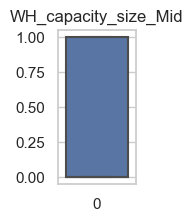

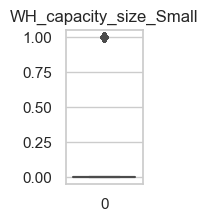

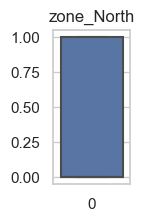

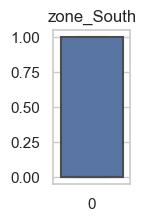

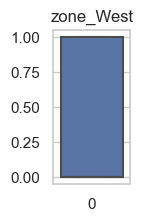

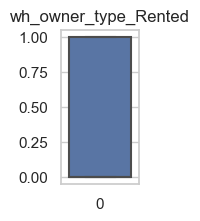

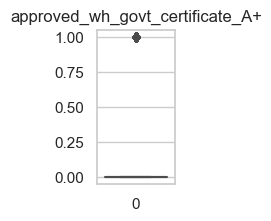

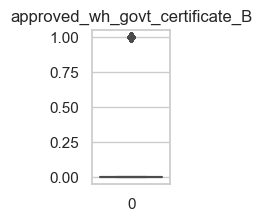

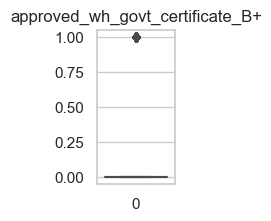

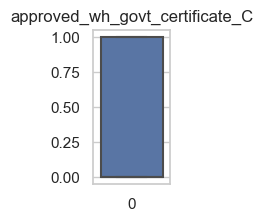

In [91]:
for i in data.columns:
    plt.figure(figsize=(1, 2))  # Adjust the figsize as needed
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

Split the data into Dependent and Independent variables

In [248]:
x=data.drop(['product_wg_ton'],axis=1) #Dropping the target variable

In [249]:
y=data['product_wg_ton']

In [250]:
x.shape

(25000, 26)

Modelling

In [251]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [252]:
model_rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [253]:
model_rf.fit(x,y)

RandomForestRegressor(random_state=42)

In [254]:
fi=model_rf.feature_importances_

In [255]:
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': fi})

In [256]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [257]:
print(feature_importance_df)

                            Feature  Importance
11       storage_issue_reported_l3m    0.982799
23   approved_wh_govt_certificate_B    0.004353
24  approved_wh_govt_certificate_B+    0.004237
2               transport_issue_l1y    0.001133
4                   retail_shop_num    0.000909
12                    temp_reg_mach    0.000863
9                     dist_from_hub    0.000859
5                   distributor_num    0.000784
10                      workers_num    0.000702
1                num_refill_req_l3m    0.000610
14                   govt_check_l3m    0.000591
13                 wh_breakdown_l3m    0.000423
22  approved_wh_govt_certificate_A+    0.000313
3                 Competitor_in_mkt    0.000282
0                  WH_regional_zone    0.000245
25   approved_wh_govt_certificate_C    0.000120
21             wh_owner_type_Rented    0.000109
8                   electric_supply    0.000098
19                       zone_South    0.000088
18                       zone_North    0

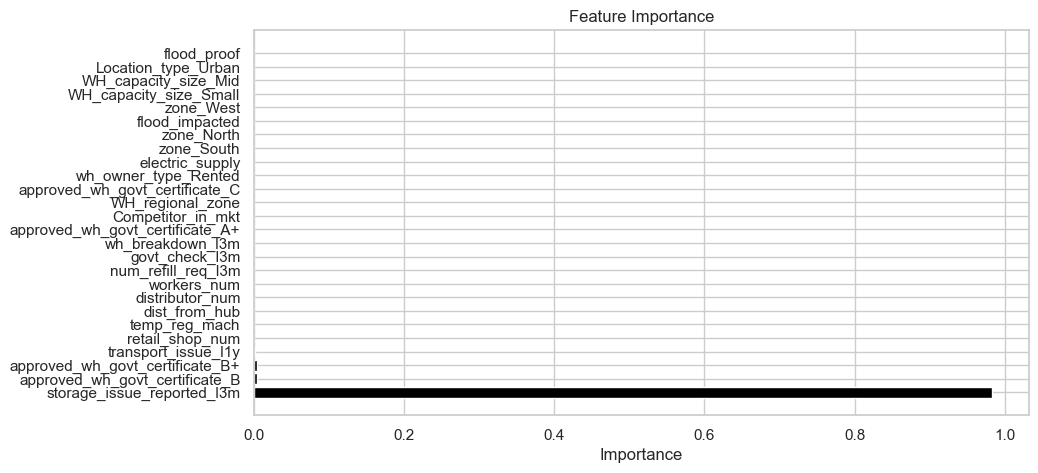

In [258]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Split Dataset into Train & Test for Modeling

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [266]:
from sklearn.preprocessing import MinMaxScaler

In [267]:
mmscaler=MinMaxScaler(feature_range=(0,1)) # setting the range between 0 to 1.
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)

In [268]:
y_train

6920     13085
17926    29143
1123     31101
4518     33112
5576     27089
         ...  
21575    26107
5390     20147
860      26109
15795    23134
23654    22062
Name: product_wg_ton, Length: 18750, dtype: int64

In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [116]:
def evaluate_function(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sqaure=r2_score(true,predicted)
    return  mae,mse,rmse,r2_sqaure

In [128]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Reg": SVR(),
    "RandomForest": RandomForestRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

model_list = []
r2_list = []

def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_function(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_function(y_test, y_test_pred)

    model_list.append(model_name)
    r2_list.append(model_test_r2)

    print(f"Model performance of {model_name} on Training set")
    print("Root Mean Square Error: {:.5f}".format(model_train_rmse))
    print("Mean Square Error: {:.5f}".format(model_train_mse))
    print("Mean Absolute Error: {:.5f}".format(model_train_mae))
    print("R2 Score: {:.5f}".format(model_train_r2))
    print('\n')
    print(f"Model performance of {model_name} on Test set")
    print("Root Mean Square Error: {:.5f}".format(model_test_rmse))
    print("Mean Square Error: {:.5f}".format(model_test_mse))
    print("Mean Absolute Error: {:.5f}".format(model_test_mae))
    print("R2 Score: {:.5f}".format(model_test_r2))
    print('\n')

# Assuming x_train, y_train, x_test, y_test are already defined
for model_name, model in models.items():
    evaluate_model(model, x_train, y_train, x_test, y_test, model_name)


Model performance of Linear Regression on Training set
Root Mean Square Error: 1387.40351
Mean Square Error: 1924888.49538
Mean Absolute Error: 1008.00735
R2 Score: 0.98570


Model performance of Linear Regression on Test set
Root Mean Square Error: 1400.51165
Mean Square Error: 1961432.89431
Mean Absolute Error: 1012.33646
R2 Score: 0.98549


Model performance of Decision Tree on Training set
Root Mean Square Error: 0.00000
Mean Square Error: 0.00000
Mean Absolute Error: 0.00000
R2 Score: 1.00000


Model performance of Decision Tree on Test set
Root Mean Square Error: 1319.44812
Mean Square Error: 1740943.33248
Mean Absolute Error: 886.39616
R2 Score: 0.98713


Model performance of Support Vector Reg on Training set
Root Mean Square Error: 11476.43015
Mean Square Error: 131708448.89945
Mean Absolute Error: 9477.99785
R2 Score: 0.02128


Model performance of Support Vector Reg on Test set
Root Mean Square Error: 11504.52890
Mean Square Error: 132354185.20242
Mean Absolute Error: 9483.7

In [272]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Gradient Boost,0.993565
3,RandomForest,0.993353
7,XGBoost,0.993171
1,Decision Tree,0.987125
4,Lasso,0.985498
0,Linear Regression,0.985495
5,Ridge,0.985488
2,Support Vector Reg,0.021209


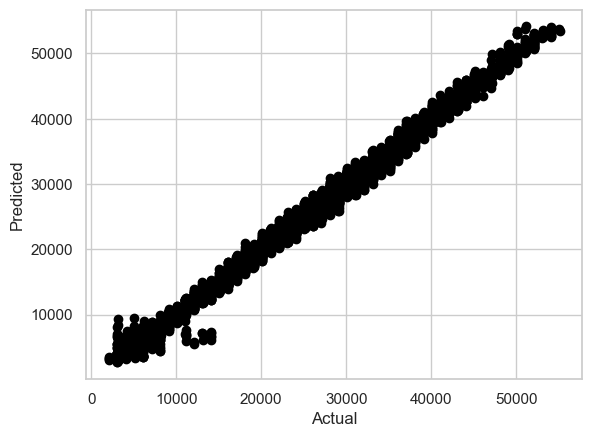

In [273]:
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

# Scatter plot
plt.scatter(y_test, y_test_pred, color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

hyper parameter tuning


In [275]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [0.01, 1],
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=param_distributions,
    scoring="neg_mean_absolute_error",
    n_iter=20,
    random_state=0,
    n_jobs=2,
)
search_cv.fit(x_train, y_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,mean_test_error,std_test_error
10,50,5,1,714.216304,5.946341
9,50,20,1,735.523535,12.091623
14,20,10,1,744.410830,5.859664
18,20,20,1,744.410830,5.859664
6,500,100,1,826.531946,9.229507
0,10,20,1,837.344424,20.072905
2,10,10,1,837.344424,20.072905
13,100,2,1,930.350528,6.698242
17,2,10,1,1473.217435,24.577647
5,2,100,1,1473.217435,24.577647


In [276]:
print("The best estimator returned by RandomizedSearchCV is:", search_cv.best_estimator_)


The best estimator returned by RandomizedSearchCV is: GradientBoostingRegressor(learning_rate=1, max_leaf_nodes=5, n_estimators=50)


In [277]:
GB=search_cv.best_estimator_
GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=1, max_leaf_nodes=5, n_estimators=50)

In [278]:
y_pred=GB.predict(x_test)

In [279]:
y_pred

array([ 6711.50600597, 17431.1135726 , 10826.13569753, ...,
        6940.78067501,  4078.59395684, 18731.3723502 ])

In [280]:
print(f"Model performance of Gradient Boosting on Training set")
print("Root Mean square Error : {:.5f}".format(model_train_rmse))
print("Mean Square Error : {:.5f}".format(model_train_mse))
print("Mean Absolute Error : {:.5f}".format(model_train_mae))
print("R2 Score : {:.5f}".format(model_train_r2))
print('\n')
print(f"Model performance of Gradient Boosting on Test set")
print("Root Mean square Error : {:.5f}".format(model_test_rmse))
print("Mean Square Error : {:.5f}".format(model_test_mse))
print("Mean Absolute Error : {:.5f}".format(model_test_mae))
print("R2 Score : {:.5f}".format(model_test_r2))
print('\n')

Model performance of Gradient Boosting on Training set
Root Mean square Error : 934.69354
Mean Square Error : 873652.01790
Mean Absolute Error : 694.97912
R2 Score : 0.99351


Model performance of Gradient Boosting on Test set
Root Mean square Error : 932.82419
Mean Square Error : 870160.96149
Mean Absolute Error : 698.03257
R2 Score : 0.99356




Conclusion: The application of data-driven machine learning techniques has proven to be highly effective in addressing the demand-supply imbalance within the fast-moving consumer goods (FMCG) sector, specifically for Noodles Company. After thorough analysis, it is evident that the Gradient Boosting Regressor algorithm yields optimal results, demonstrating consistent performance on both training and test datasets, with the highest R2 score achieved.
In this context, hyperparameter tuning is deemed unnecessary, as the model has already attained an impressive accuracy of 99.35%. The associated evaluation metrics, including an RMSE of 932.82419, MSE of 870160.96149, and MAE of 698.03257, further reinforce the model's robustness.
The demand forecasts generated by the Gradient Boosting model possess significant potential for enhancing warehouse inventory optimization. This, in turn, promises cost efficiencies and minimized losses for the Noodles Company.